<a href="https://colab.research.google.com/github/axpat/Corona-Virus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Coronavirus Tweet Sentiment Analysis**


##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

# **GitHub Link -**

https://github.com/axpat/Corona-Virus-Tweet-Sentiment-Analysis

# **Problem Statement**


**Problem Description:** This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.

You are given the following information:

1.UserName

2.ScreenName

3.Location

4.TweetAt

5.OriginalTweet

6.Sentiment

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

### Dataset Loading

In [ ]:
# Load Dataset
ctsa = pd.read_csv("https://raw.githubusercontent.com/axpat/Corona-Virus-Tweet-Sentiment-Analysis/main/Data/Coronavirus%20Tweets.csv",encoding='latin-1')
                  


### Dataset First View

In [ ]:
# Dataset First Look
ctsa.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count



In [ ]:
# Dataset Rows & Columns count
ctsa.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
ctsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
ctsa.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
ctsa.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Text(86.0, 0.5, 'Null-Values in yellow shadow.')

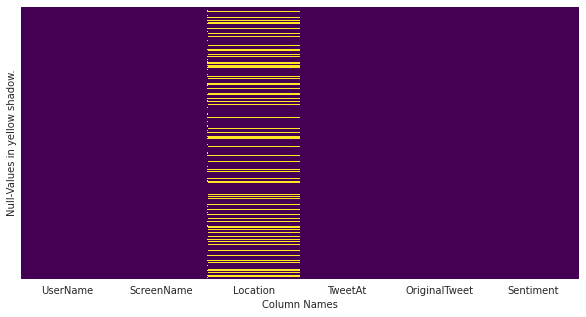

In [ ]:
# Visualizing the missing values
# setting configuration for our plots
plt.rcParams['figure.figsize'] = (10, 5)

sns.heatmap(ctsa.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xlabel('Column Names')
plt.ylabel('Null-Values in yellow shadow.')

Null values percentage calculation

In [ ]:
# perecntage of null_values in each column
for i in list(ctsa.columns):
  null_percent = round((ctsa[i].isna().sum()/len(ctsa[i]))*100)
  print(f'Percentage of null values in {i} is {null_percent}%')

Percentage of null values in UserName is 0%
Percentage of null values in ScreenName is 0%
Percentage of null values in Location is 21%
Percentage of null values in TweetAt is 0%
Percentage of null values in OriginalTweet is 0%
Percentage of null values in Sentiment is 0%


### What did you know about your dataset?

Following insights are gained from dataset until now:

1.This dataset has 41157 rows and 6 columns.

2.Those 6 columns are UserName, ScreenName, Location, TweetAt, OriginalTweet and Sentiment.

3.Out of these 6 columns, Location has 8590 null values.

4.Out of 6 columns first two are in integer format and last 4 are in object format.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
ctsa.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
ctsa.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

1. UserName and ScreenName are two columns with integer values in them, while last four variables are of object type. Since ScreenName and UserName columns are in coded format we cannot gain any useful insight from them.

2. From Location column it can be observed that most of the tweets were made from London, as it visible by its top status and it's frequency being 540. There are a total of 12220 locations from where tweets were made.

3. From TweetAt, 20 March, 2020 is the date on which most of the tweets were made out of all dates in dataset. Also there are 30 unique values in TweetAt column, which means that this data is from a total of 30 days.

4. From sentiment columns it can be observed that, there are a total of 5 types of sentiment in entire data, with positive being the most frequent sentiment occuring over 11422 rows.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
ctsa.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

           index      0
0       UserName  41157
1     ScreenName  41157
2       Location  12220
3        TweetAt     30
4  OriginalTweet  41157
5      Sentiment      5
         columns  values
0       UserName   41157
1     ScreenName   41157
2       Location   12220
3        TweetAt      30
4  OriginalTweet   41157
5      Sentiment       5


Text(0.5, 0, 'Features')

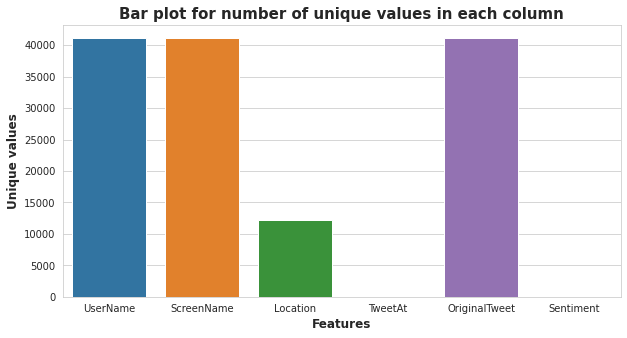

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
m = ctsa.nunique().reset_index()
print(m)
m.rename(columns={'index':'columns',0:'values'}, inplace=True)
print(m)
sns.set_style("whitegrid")
sns.barplot(data=m, x=m['columns'], y=m['values'])
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')

Since, TweetAt and Sentiment column has so less unique values as compared to other columns, it is not observable on graph, so I am gonna another graph on which numbers would be written above bars.

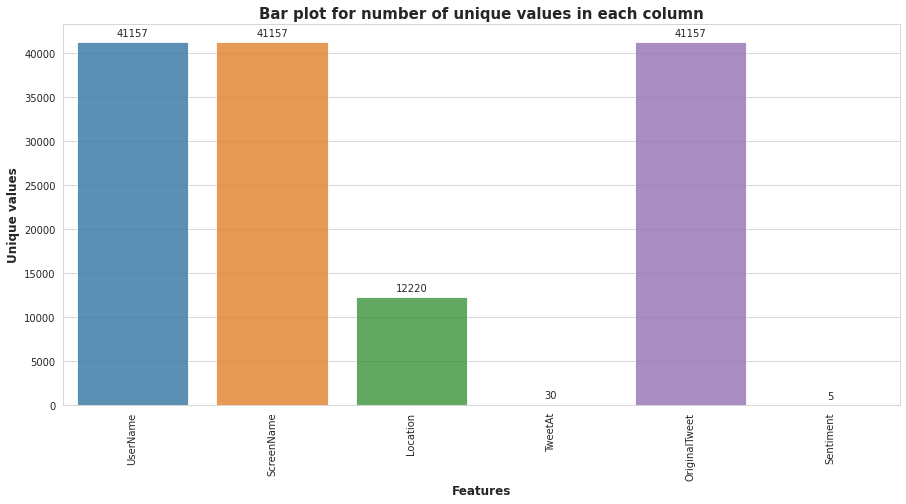

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = ctsa.columns
unique=[]
for i in ctsa.columns:
    unique.append(ctsa[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# checking unique values in Location column
ctsa['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# checking unique values in sentiment column
ctsa['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

We can observe that for the purpose of model building only two columns are pertinent. Since, UserName and ScreenName columns are coded for privacy reasons, they don't contribute much to our purpose, so we won't take them for further analysis. let's verify that further by checking rows of both columns

In [ ]:
# Write your code to make your dataset analysis ready.
#checking df column username
ctsa['UserName'][0]

3799

In [ ]:
#checking df column screenname
ctsa['ScreenName'][0]

48751

In [ ]:
# checking range of dates
first_tweet = ctsa['TweetAt'].unique()[1]
last_tweet = ctsa['TweetAt'].unique()[-1]

print(f'Tweets in dataset ranges from {first_tweet}, to {last_tweet}')

Tweets in dataset ranges from 17-03-2020, to 14-04-2020


In [ ]:
# All tweets came only from March and April month of 2020.
ctsa.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# converting string data in TweetAt column to datetime format
ctsa['TweetAt'] = pd.to_datetime(ctsa['TweetAt'], format='%d-%m-%Y')

In [ ]:
# inspecting column original tweet
ctsa['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
# checking most usernames location
ctsa.groupby('Location')['UserName'].count().reset_index().sort_values('UserName', ascending=False).rename(columns={'UserName':'UserCount'})

,Location,UserCount
5690,London,540
10455,United States,528
5765,"London, England",520
7091,"New York, NY",395
10793,"Washington, DC",373
...,...,...
4595,I chose Thailand. And you?,1
4596,I don't know,1
4597,I fly FedEx Cargo,1
4598,I live by the river,1


In [ ]:
# checking location values with less usernames, here we will take 20 as our threshold
m = ctsa.groupby('Location')['UserName'].count().reset_index().sort_values('UserName', ascending=False).rename(columns={'UserName':'UserCount'})
m[m['UserCount']<20]

,Location,UserCount
475,????,19
2068,Calgary,19
1313,"Barcelona, Spain",19
3910,Germany,19
1861,"Bronx, NY",19
...,...,...
4595,I chose Thailand. And you?,1
4596,I don't know,1
4597,I fly FedEx Cargo,1
4598,I live by the river,1


We can see a lot of rows with one usercount, let's count their number

In [ ]:
# counting locations with one username
m[m['UserCount']<=1].count()

Location     9406
UserCount    9406
dtype: int64

In [ ]:
# checking percentage of locations with only one user
percentage_of_locations_with_one_user = round((m[m['UserCount']==1].count()[0]/len(ctsa))*100,2)
print(f'About {percentage_of_locations_with_one_user}% of all rows have locations with only one username')

About 22.85% of all rows have locations with only one username


Similiar condition can be applicable for ScreenName as well.

# **Checking rows with different sentiments**

In [ ]:
# printing columns with 
ctsa[ctsa['Sentiment']=='Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative
20,3819,48771,southampton soxx xxx,2020-03-16,with 100 nations inficted with covid 19 th...,Extremely Negative
27,3826,48778,Everywhere You Are!,2020-03-16,This morning I tested positive for Covid 19. I...,Extremely Negative
29,3828,48780,"Someplace, USA",2020-03-16,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
42,3841,48793,Houston,2020-03-16,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
...,...,...,...,...,...,...
41115,44914,89866,NaN,2020-04-14,Food Banks are not equipped for a 30% unemploy...,Extremely Negative
41128,44927,89879,"Melbourne, Australia",2020-04-14,The COVID-19 pandemic and global oil price war...,Extremely Negative
41130,44929,89881,NaN,2020-04-14,Squeo works in the meat department of a Kroger...,Extremely Negative
41133,44932,89884,Austria,2020-04-14,A Singaporean politician who slammed a woman s...,Extremely Negative


In [ ]:
# picking one particular extremely negative tweet
ctsa[ctsa['Sentiment']=='Extremely Negative'].loc[27,'OriginalTweet']

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [ ]:
# another extremely negative tweet
ctsa[ctsa['Sentiment']=='Extremely Negative'].loc[41128,'OriginalTweet']

'The COVID-19 pandemic and global oil price wars are having an economic impact worldwide, but one consequence is lower fuel prices at Australian petrol pumps for the foreseeable.\r\r\n\r\r\n#UniMelbPursuit @dprbyrne @BusEcoNews  \r\r\nhttps://t.co/aB6phfFIwI'

We can see these sentences contain words like covid 19, positive, isolated, virus, pandemic.

In [ ]:
# inspecting rows with negative sentiment
ctsa[ctsa['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,3808,48760,"BHAVNAGAR,GUJRAT",2020-03-16,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,Downstage centre,2020-03-16,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,"Ketchum, Idaho",2020-03-16,In preparation for higher demand and a potenti...,Negative
28,3827,48779,"New York, NY",2020-03-16,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,NaN,2020-03-16,There Is of in the Country The more empty she...,Negative
...,...,...,...,...,...,...
41127,44926,89878,NaN,2020-04-14,Today at the grocery store I saw someone getti...,Negative
41131,44930,89882,"Accra, Ghana",2020-04-14,In every human affliction there are gainers a...,Negative
41147,44946,89898,"Brooklyn, NY",2020-04-14,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",2020-04-14,Still shocked by the number of #Toronto superm...,Negative


In [ ]:
# checking one particular tweet with negative sentiment
ctsa[ctsa['Sentiment']=='Negative'].loc[41127,'OriginalTweet']

"Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new version of yelling fire in a movie theater #COVID2019 #COVID19 #QuarantineLife"

In [ ]:
# checking another tweet with negative sentiment
ctsa[ctsa['Sentiment']=='Negative'].loc[28,'OriginalTweet']

'Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\r\r\nTo file a complaint (use the word"Overcharge") https://t.co/MdMmoBttOP\r\r\n#COVID19 #CovidNYC'

In [ ]:
# checking columns with neutral sentiment
ctsa[ctsa['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,2020-03-16,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",2020-03-16,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,2020-03-16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",2020-03-16,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,2020-04-14,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,2020-04-14,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,2020-04-14,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral


In [ ]:
# checking one neutral tweet
ctsa[ctsa['Sentiment']=='Neutral'].loc[7,'OriginalTweet']

"Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ"

In [ ]:
# checking another neutral tweet
ctsa[ctsa['Sentiment']=='Neutral'].loc[41152,'OriginalTweet']

'Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp'

In [ ]:
# checking rows with positive sentiment
ctsa[ctsa['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41140,44939,89891,Pakistan,2020-04-14,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
41145,44944,89896,"Manhattan, NY",2020-04-14,How exactly are we going to re-open New York C...,Positive
41146,44945,89897,"Gurgaon, India",2020-04-14,#Gold prices rose to a more than 7-year high t...,Positive
41150,44949,89901,OHIO,2020-04-14,I never that weÂd be in a situation &amp; wor...,Positive


In [ ]:
# checking one tweet with positive sentiment
ctsa[ctsa['Sentiment']=='Positive'].loc[3,'OriginalTweet']

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [ ]:
# checking another tweet with positive sentiment
ctsa[ctsa['Sentiment']=='Positive'].loc[41154,'OriginalTweet']

'You know itÂ\x92s getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!'

In [ ]:
# checking rows with extremely positive sentiment
ctsa[ctsa['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
11,3810,48762,"Pitt Meadows, BC, Canada",2020-03-16,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,2020-03-16,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,2020-03-16,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
22,3821,48773,NaN,2020-03-16,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,2020-03-16,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
...,...,...,...,...,...,...
41137,44936,89888,"LES, NYC",2020-04-14,Distilleries have switched portions of their p...,Extremely Positive
41138,44937,89889,"Los Angeles, CA",2020-04-14,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive
41142,44941,89893,Juba south sudan,2020-04-14,@MajangChien @MTNSSD @MTNSSD is worst than COV...,Extremely Positive
41148,44947,89899,NaN,2020-04-14,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive


In [ ]:
# checking a particular tweet with extremely positive sentiment
ctsa[ctsa['Sentiment']=='Extremely Positive'].loc[18,'OriginalTweet']

'Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂ\x93As COVID-19 has spread, weÂ\x92ve seen a significant increase in people shopping online for groceries,Â\x94 a spokeswoman said in a statement. Â\x93Today this resulted in a systems impact affecting our ...\r\r\n https://t.co/TbzZ2MC3b3'

In [ ]:
# checking another tweet with extremely positive sentiment
ctsa[ctsa['Sentiment']=='Extremely Positive'].loc[41137,'OriginalTweet']

'Distilleries have switched portions of their production from alcohol to hand sanitizer to help with'

### What all manipulations have you done and insights you found?

Firstly, i examined columns that might be required for modelling purpose, and upon inspecting columns UserName and ScreenName, it has been discovered that values in them are arbitrary codes given to individuals to protect their privacy.

Then i applied groupby on Location column with respect to username count to find what are the locations where most users are coming from, and discovered that like most tweets, most of the users were from London as well.

In order to understand what Locations have less UserCounts, I applied count function setting threshold of minimum tweets to 20, and upon further inspecting found that there are a lot of locations with only one usercount, and also with locations with low usercount, there were many rows in location column which were filled with unnecessary data.

Around 23 percent of all rows have locations with only one username, 23% of rows is high enough not to replace them with some other value and infuence any overall analysis and modelling (if this feature is used), since a lot of rows doesn't have proper location in them. Also, it was earlier discovered that Location had around 8600 null values in it.

Rows with sentiment positive and extremely postive had words that sounded similar, same with the case in negative and extremely negative rows.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**

In [ ]:
ctsa.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

#### Chart - 1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


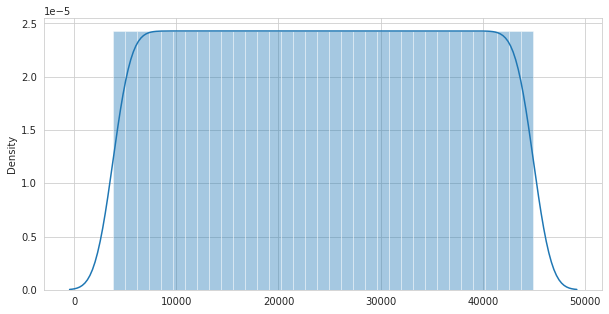

In [ ]:
# Chart - 1 visualization code
sns.distplot(x=ctsa['UserName'])

##### 1. Why did you pick the specific chart?

 The idea behind picking this chart is to depict distribution of UserNames across Dataset.

##### 2. What is/are the insight(s) found from the chart?

It clearly indicates that, UserNames are not a relevant column to look upon , since most of the values are unique and not required for any purpose. ScreenName demonstrates the same aspect.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This column is not relevant for any purpose for making insights.

#### Chart - 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


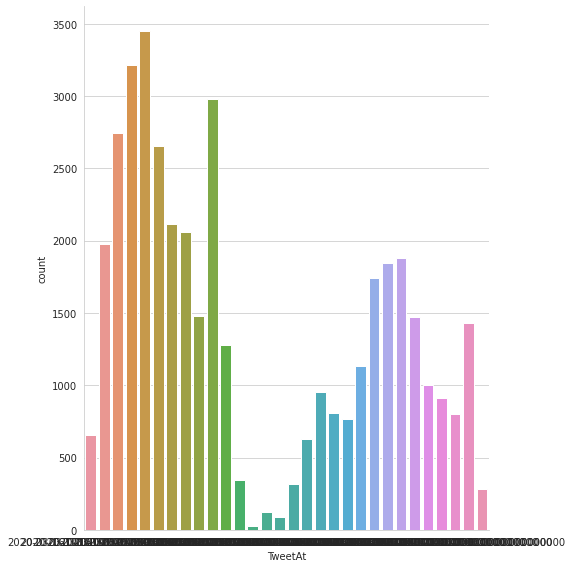

In [ ]:
# count of tweets from different locations
plt.rcParams['figure.figsize'] = (10, 5)
sns.catplot("TweetAt", data=ctsa, kind="count", height=8)

Plot Of Top 15 Locations Of Tweet.

In [ ]:
# creating variable for containing value counts in location columns
loc_analysis = pd.DataFrame(ctsa['Location'].value_counts().sort_values(ascending=False))

# changing name of location to count
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [ ]:
# importing plotly for plotiing 
import plotly.graph_objects as go

In [ ]:
# Chart - 2 visualization code
# visualising top 15 locations in a pie chart
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

I picked pie chart using plotly library because it became easier for me to plot it in the form of pie chart, also I wanted to show only 15 locations for that purpose.

##### 2. What is/are the insight(s) found from the chart?



1.   Most of the tweets came from London, United Kingdom (11.7%)
2.   After London, most of the tweets came from United States of America, followed by India, Australia and Canada.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This column is not relevant for any purpose for making insights.

#### Chart - 3

**Sentiment Countplot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



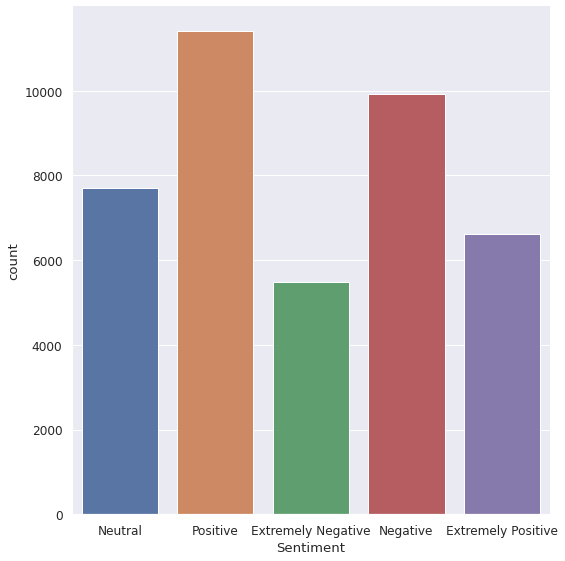

In [ ]:
# Chart - 3 visualization code
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=ctsa, kind="count", height=8)

##### 1. Why did you pick the specific chart?

To show count of each type of sentiment and their frequency in our dataset.

##### 2. What is/are the insight(s) found from the chart?

1.  Most of tweets have positive sentiment about them, followed by negative and neutral.
2.  Extremely Negative sentiments were least in count.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these gained insights can help stakeholders understand that most of the people keep an overall positive outlook over the Covid crisis, and they can take actions, make strategies, and plans to cope with these scenerios.

#### Chart - 4

In [ ]:
ctsa.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

Chart showing tweet frequencies over different dates in dataset.

In [ ]:
# frequency of tweets over different dates
tweet_freq_df = ctsa.groupby('TweetAt')['OriginalTweet'].count().reset_index().sort_values('TweetAt', ascending=True)
tweet_freq_df.rename(columns={'OriginalTweet':'TweetCounts'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Frequency of tweets over two months')

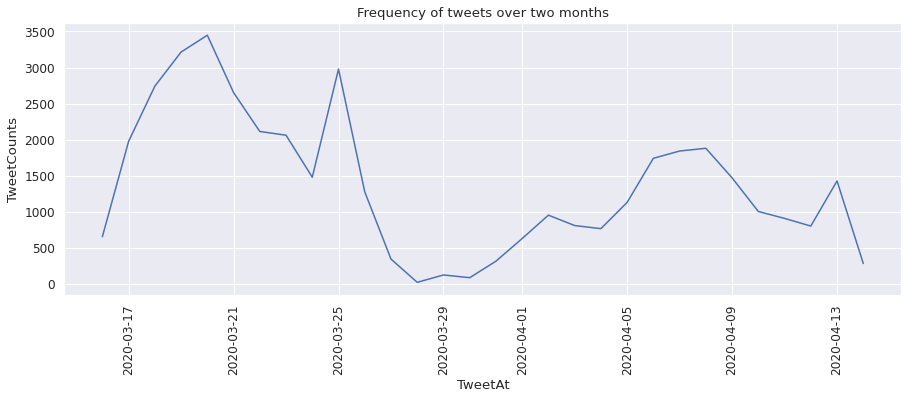

In [ ]:
# Chart - 4 visualization code
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (15, 5)
sns.lineplot(tweet_freq_df['TweetAt'],tweet_freq_df['TweetCounts'])
plt.xticks(rotation='vertical')
plt.title('Frequency of tweets over two months')

##### 1. Why did you pick the specific chart?

I picked this chart to show frequency of tweets over two months. i.e, entire duration of our tweet dataset.

##### 2. What is/are the insight(s) found from the chart?

1.   Most of the tweets were made between 17 March, 2020 to 21st March, 2020, maybe this was because it was the beginning of lockdown for the pandemeic period which governments had started to implement.
2.   Also, it shows uncertainity amongst people, as they swirched to twitter to express how they were feeling so that they could sympathise with each other.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights actually can help understand how people behave when there is some kind of health emergency across world, and can help relevant businesses like pharmaceutical companies, paramedical companies, hospitals, governemnts etc, become prepared from beginning to tackle these conditions.

#### Chart - 5

In [ ]:
df.head(2)

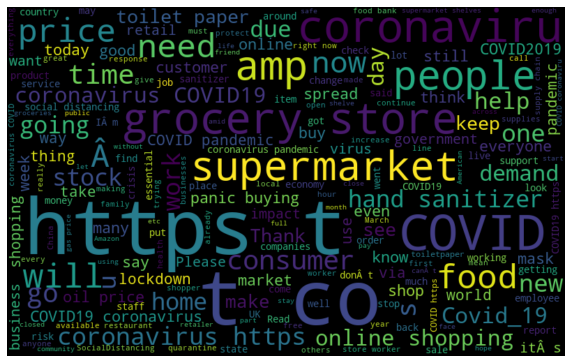

In [ ]:
# Chart - 5 visualization code
# create text from all tweets
all_words = ' '.join([text for text in ctsa['OriginalTweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

For Understanding the common words used in the tweets using WordCloud.

##### 2. What is/are the insight(s) found from the chart?

Since, Tweets have not been cleaned yet, it is a bit tough to understand but, it seems like words like coronavirus, covid, lockdown, etc. were quite frequent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This column is not relevant for any purpose for making insights.

#### Chart - 6

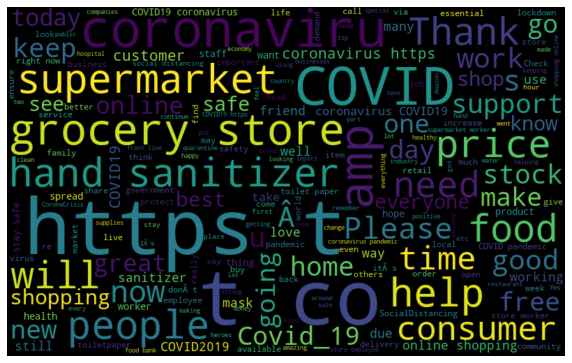

In [ ]:
# Chart - 6 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in ctsa['OriginalTweet'][ctsa['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?


I picked this chart to create a worldcloud from words in extremely positive labeles tweets .

##### 2. What is/are the insight(s) found from the chart?

I found that the words such as, Help, Consumer, Please, Stock, Need, price were quite common in tweets labeled Extremely positive.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it might help businesses detect sentiment of people overall towards consumption perspective, also it can help businesses and analysts devise plan for near future.

#### Chart - 7

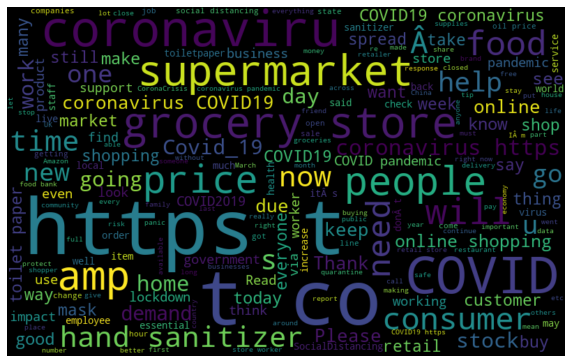

In [ ]:
# Chart - 7 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in ctsa['OriginalTweet'][ctsa['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this to show world Cloud for Tweets labeled positive.

##### 2. What is/are the insight(s) found from the chart?

It shows words that were most frequently occuring in tweets with positive label.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it might help businesses detect sentiment of people overall towards consumption perspective, also it can help businesses and analysts devise plan for near future.

#### Chart - 8

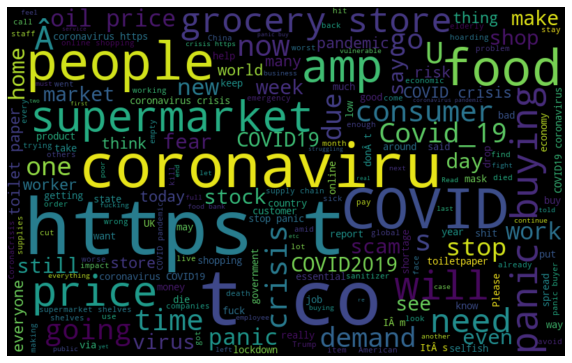

In [ ]:
# Chart - 8 visualization code
# create text from just normal tweets
normal_words = ' '.join([text for text in ctsa['OriginalTweet'][ctsa['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***